# Task-2                Question-1

## Question requriement :
 Train a simple Linear Regression model

## Simple Linear Regression:
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Importing the dataset from the URL given

In [2]:
URL= "http://bit.ly/w-data"
Dataset = pd.read_csv(URL)

Dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Checking for any null values

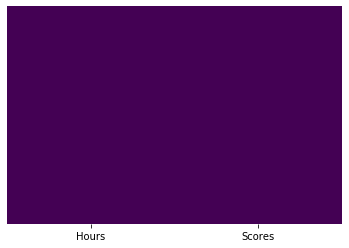

In [3]:
import seaborn as sns
sns.heatmap(Dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Visualization of Dataset

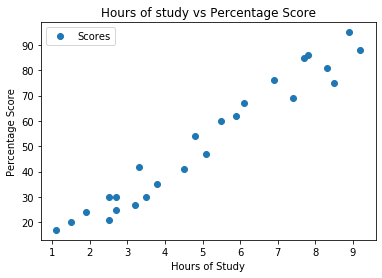

In [4]:
# Plotting the distribution of scores
Dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours of study vs Percentage Score')  
plt.xlabel('Hours of Study')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing the Data and Split it in training data and test data  80-20% using sklearn

In [5]:
from sklearn.model_selection import train_test_split

X = Dataset.iloc[:, :-1].values  
y = Dataset.iloc[:, 1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### Training the model 

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Ploting the best fitted line

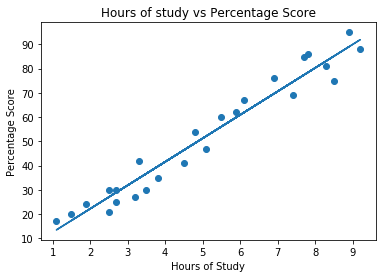

In [7]:
plot_line = lr.coef_*X + lr.intercept_

plt.scatter(X, y)
plt.plot(X, plot_line)
plt.title('Hours of study vs Percentage Score')  
plt.xlabel('Hours of Study')  
plt.ylabel('Percentage Score')  
plt.show()

### Getting the accuracy scores for training and test

In [8]:
print('Training score')
print(lr.score(X_train, y_train))
print('Test score')
print(lr.score(X_test, y_test))

Training score
0.9491209376364417
Test score
0.9678055545167994


### Making preditions

In [9]:
y_pred = lr.predict(X_test) 

### Comparision Dataframe between y_pred and y_test

In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Predicting value for given hours=9.25

In [11]:
#reshaping to(1,.1)
hours = np.array([9.25])
hours = hours.reshape(-1, 1)

print('No. of hours', hours[0][0])
print('\nPredicted Score:/Percentage ',lr.predict(hours))

No. of hours 9.25

Predicted Score:/Percentage  [92.38611528]


### Evaluating the model based on following errors


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error: 18.943211722315272
